In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit



In [189]:
df = pd.read_excel("C:\\Users\\nguye\\OneDrive\\Documents\\Python Scripts\\masterthesis\\headline_cpi_ver3.xlsx")
df["month"] = pd.to_datetime(df["month"]).dt.date

In [190]:
#Level 0
level0_df = df[df['display_level']==0][["month","item_name","value"]]
level0_df = level0_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_values = level0_df[['All items']]
cpi_indicators = level0_df.drop("All items", axis = 1)

In [192]:
cpi_values.iloc[85:]

item_name   All items
month                
2007-02-01    203.499
2007-03-01    205.352
2007-04-01    206.686
2007-05-01    207.949
2007-06-01    208.352
...               ...
2023-09-01    307.789
2023-10-01    307.671
2023-11-01    307.051
2023-12-01    306.746
2024-01-01    308.417

[204 rows x 1 columns]

In [193]:
predicted_values.iloc[85:]

month
2007-02-01    203.504735
2007-03-01    205.397415
2007-04-01    206.776420
2007-05-01    208.144266
2007-06-01    208.553295
                 ...    
2023-09-01    308.621477
2023-10-01    308.128515
2023-11-01    307.738562
2023-12-01    307.408732
2024-01-01           NaN
Length: 204, dtype: float64

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 0.30959412491543814


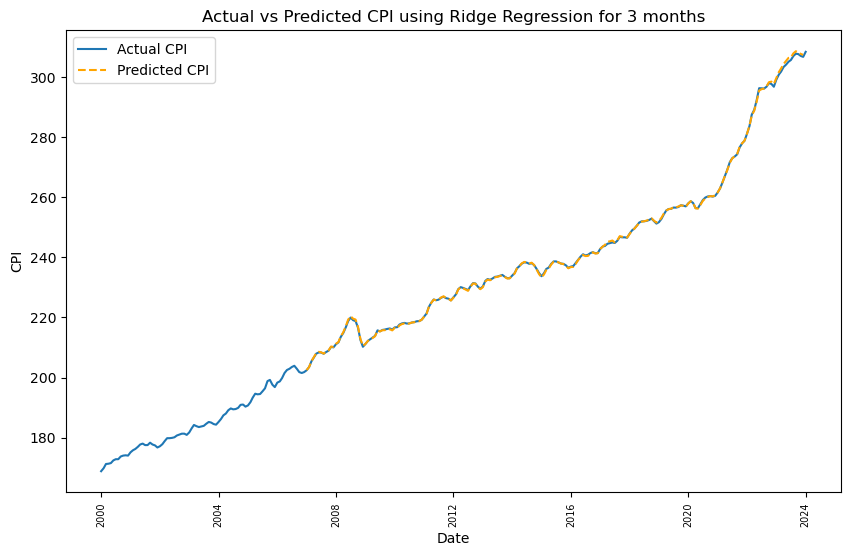

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 1.0
Root Mean Squared Error (RMSE) for 6 months: 0.3753366316861766


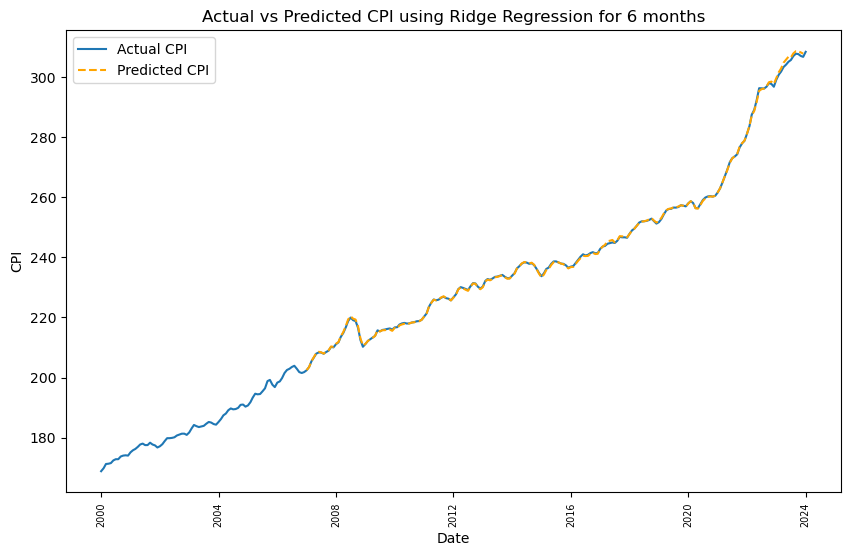

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 10.0
Root Mean Squared Error (RMSE) for 12 months: 0.5299550729954435


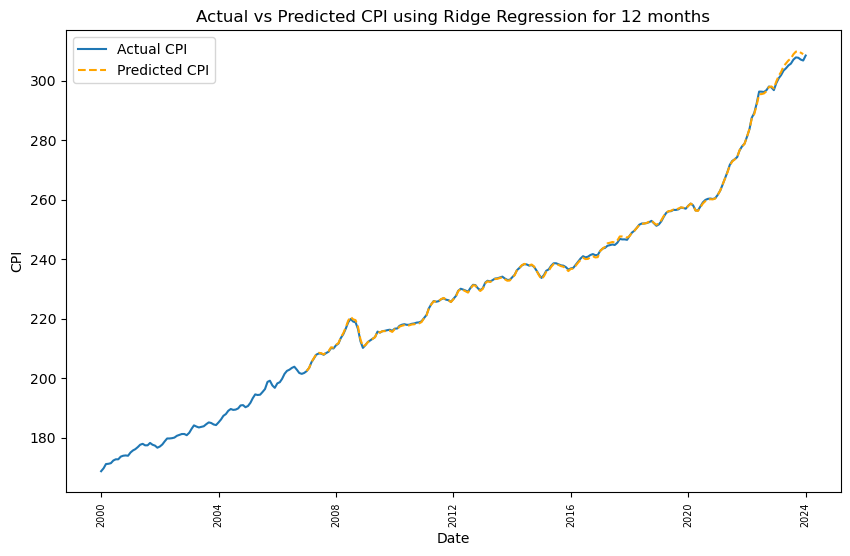

In [194]:
def sliding_window_ridge_forecast(X, y, window_size, forecast_horizon, alphas):
    predictions = pd.Series(index=y.index)

    for i in range(window_size, len(X)-forecast_horizon+1,forecast_horizon):
        # Extract the training data for the current window
        train_X = X.iloc[i-window_size:i]
        train_y = y.iloc[i-window_size:i]

        # kfcv = KFold(n_splits=5)
        # Apply time series split
        tscv = TimeSeriesSplit(n_splits=5)
        

        # Initialize Ridge Regression model with cross-validation
        ridge_cv = RidgeCV(alphas=alphas, cv= tscv)

        # Fit the Ridge Regression model on the training data
        ridge_cv.fit(train_X, train_y)


        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i:i+forecast_horizon, :]

        # Predict the values using the Ridge Regression model
        forecast_predictions = ridge_cv.predict(forecast_X)

        # Append only the predictions for the test set to the result list
        forecast_dates = y.index[i:i+forecast_horizon]
        predictions.loc[forecast_dates] = forecast_predictions.flatten()

    return predictions, ridge_cv.alpha_


window_size = 7 * 12  # 7 years of monthly data
forecast_horizon = [3,6,12]  # 12 months forecast



for j in forecast_horizon:
    alphas = [0.00001
              , 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:-1], predicted_values.iloc[85:-1]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()


In [ ]:
#Level 1
level1_df = df[df['display_level']==1][["month","item_name","value"]]
level1_df = level1_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_indicators_lv1 = level1_df.fillna(0)

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 0.05
Root Mean Squared Error (RMSE) for 3 months: 0.04814165212669144


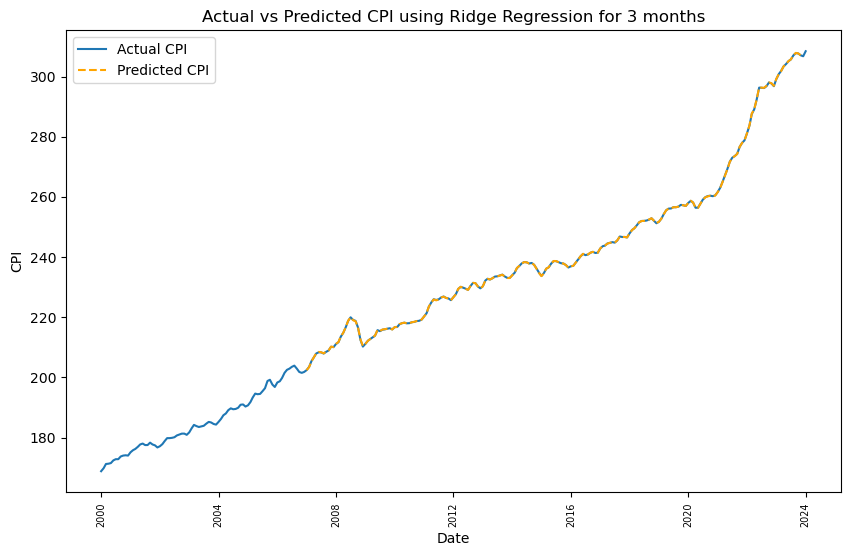

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 0.05
Root Mean Squared Error (RMSE) for 6 months: 0.0726859662804013


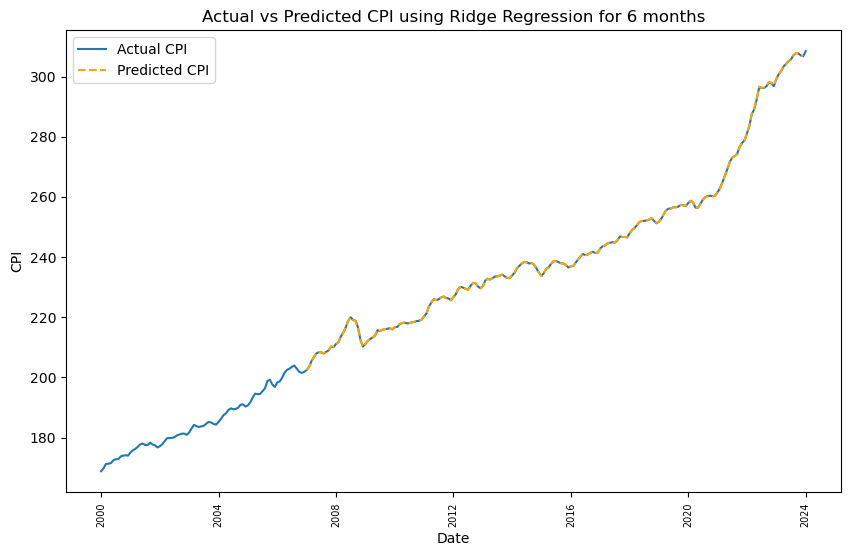

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 0.05
Root Mean Squared Error (RMSE) for 12 months: 0.11716307395725552


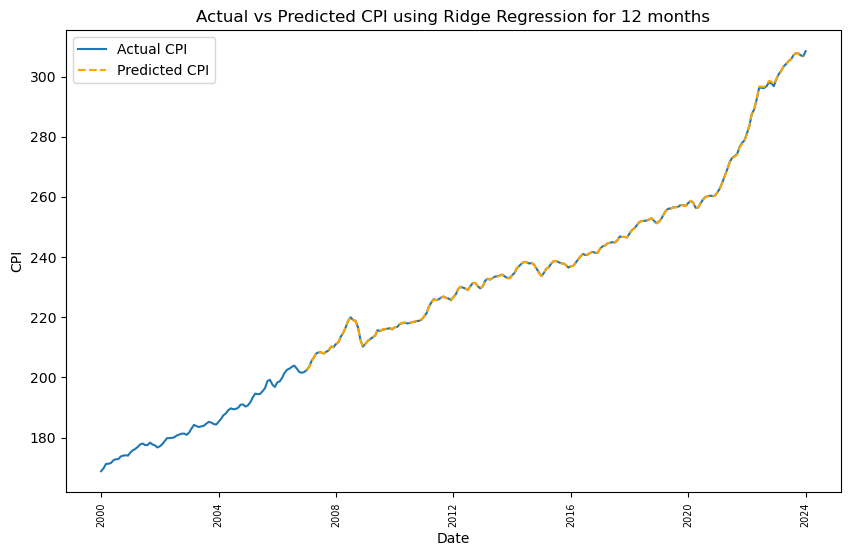

In [195]:
for j in forecast_horizon:
    alphas = [0.05, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators_lv1, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:-1], predicted_values.iloc[85:-1]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()


C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 1.0
Root Mean Squared Error (RMSE) for 3 months: 0.3035434732919698


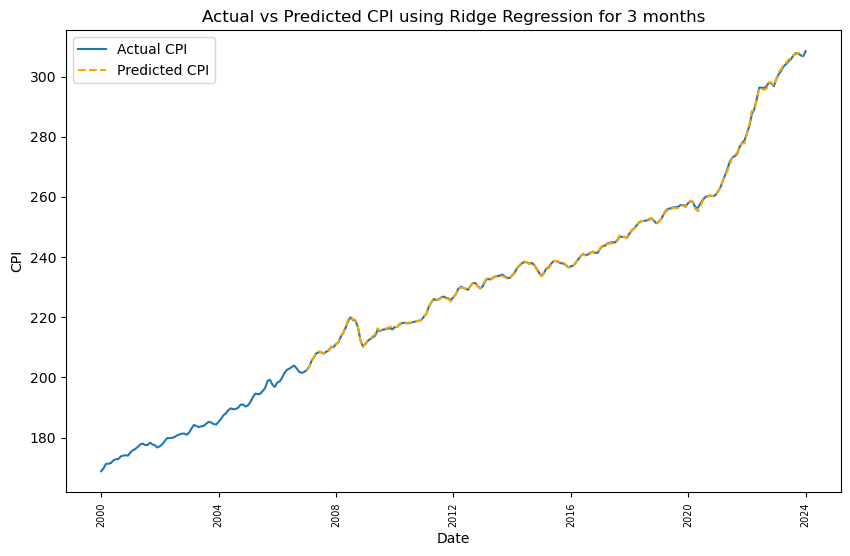

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 0.1
Root Mean Squared Error (RMSE) for 6 months: 0.41595545009955476


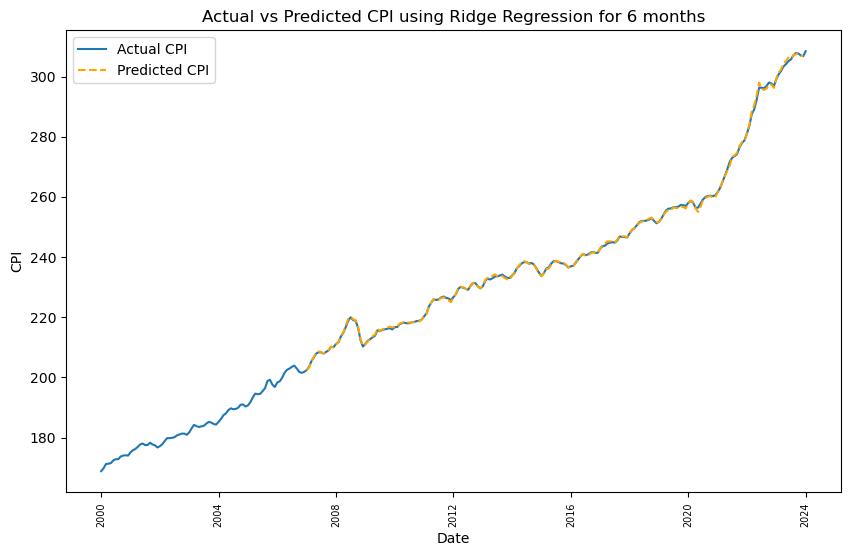

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 0.05
Root Mean Squared Error (RMSE) for 12 months: 0.7155337387751866


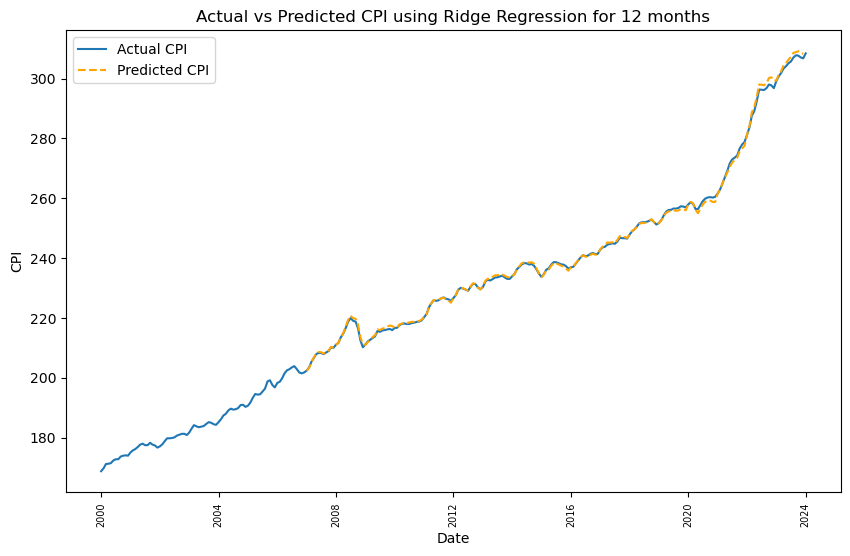

In [196]:
#Level 2
level2_df = df[df['display_level']==2][["month","item_name","value"]]
level2_df = level2_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_indicators_lv2 = level2_df.fillna(0)

for j in forecast_horizon:
    alphas = [0.05, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators_lv2, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:-1], predicted_values.iloc[85:-1]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()


C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 0.05
Root Mean Squared Error (RMSE) for 3 months: 1.175412482901717


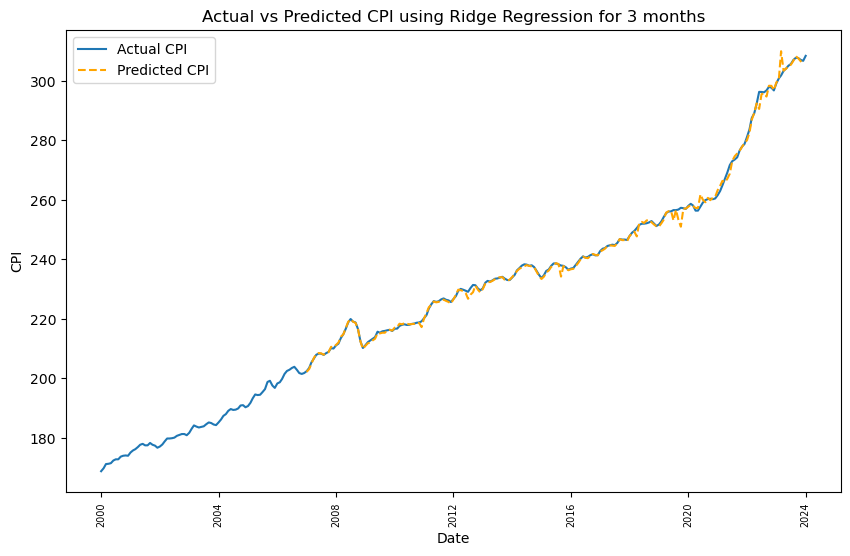

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 0.05
Root Mean Squared Error (RMSE) for 6 months: 1.2076304459415426


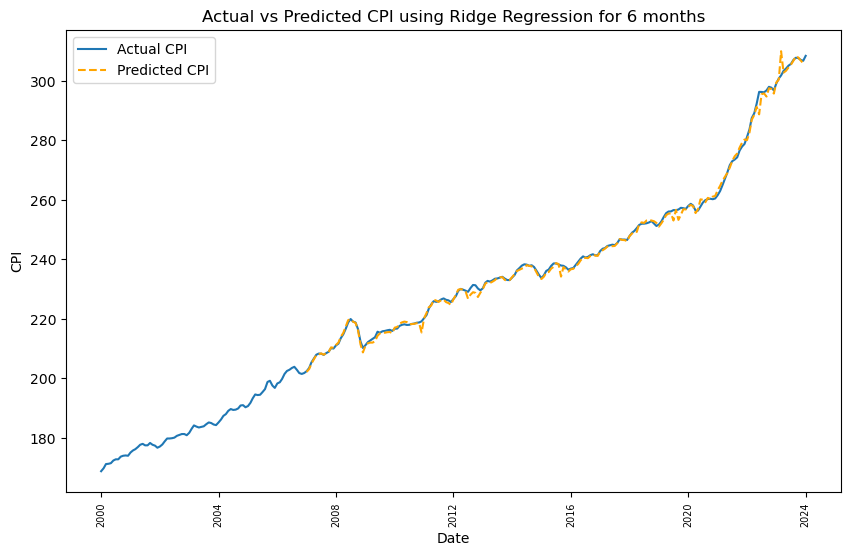

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1775680184.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 0.05
Root Mean Squared Error (RMSE) for 12 months: 1.4008172433102668


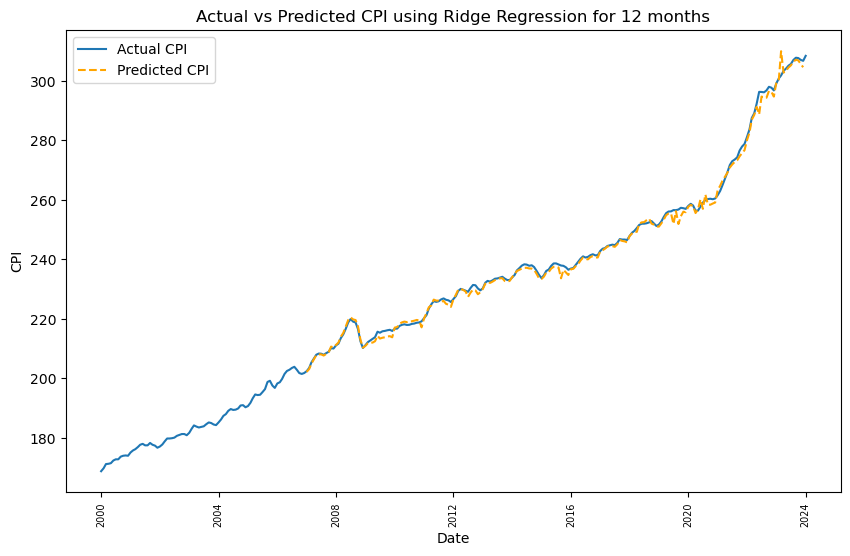

In [197]:
#Level 3
level3_df = df[df['display_level']==3][["month","item_name","value"]]
level3_df = level3_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_indicators_lv3 = level3_df.fillna(0)

for j in forecast_horizon:
    alphas = [0.05, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators_lv3, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:-1], predicted_values.iloc[85:-1]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()

In [174]:
a = level4_df[level4_df.index >= pd.to_datetime("2000-01-01").date()]

In [175]:
a.isnull().any()

item_name
Automobile service clubs                             True
Bakery products                                     False
Beer, ale, and other malt beverages at home         False
Beverage materials including coffee and tea         False
Cereals and cereal products                         False
Checking account and other bank services            False
Cheese and related products                         False
Distilled spirits at home                           False
Eggs                                                False
Electricity                                         False
Fats and oils                                       False
Fresh fruits and vegetables                         False
Fuel oil                                            False
Gasoline, unleaded midgrade                         False
Gasoline, unleaded premium                          False
Gasoline, unleaded regular                          False
Ice cream and related products                      False
Juic

In [180]:
a[a["New motorcycles"].isna()]

item_name   Automobile service clubs  Bakery products  \
month                                                   
2000-06-01                     104.3          193.000   
2000-07-01                     104.1          195.400   
2000-08-01                     104.3          196.100   
2000-09-01                     104.3          194.400   
2000-10-01                     104.3          196.000   
...                              ...              ...   
2023-09-01                       NaN          394.837   
2023-10-01                       NaN          395.858   
2023-11-01                       NaN          396.598   
2023-12-01                       NaN          395.119   
2024-01-01                       NaN          395.688   

item_name   Beer, ale, and other malt beverages at home  \
month                                                     
2000-06-01                                      157.100   
2000-07-01                                      157.500   
2000-08-01                                      157.500   
2000-09-01                                      156.400   
2000-10-01                                      156.700   
...                                                 ...   
2023-09-01                                      267.458   
2023-10-01                                      270.045   
2023-11-01                                      269.611   
2023-12-01                                      269.828   
2024-01-01                                      271.719   

item_name   Beverage materials including coffee and tea  \
month                                                     
2000-06-01                                       97.800   
2000-07-01                                       98.000   
2000-08-01                                       98.200   
2000-09-01                                       98.100   
2000-10-01                                       97.600   
...                                                 ...   
2023-09-01                                      142.471   
2023-10-01                                      141.452   
2023-11-01                                      140.795   
2023-12-01                                      139.615   
2024-01-01                                      141.736   

item_name   Cereals and cereal products  \
month                                     
2000-06-01                      176.400   
2000-07-01                      177.200   
2000-08-01                      176.800   
2000-09-01                      176.500   
2000-10-01                      177.700   
...                                 ...   
2023-09-01                      287.999   
2023-10-01                      286.804   
2023-11-01                      286.694   
2023-12-01                      283.027   
2024-01-01                      283.917   

item_name   Checking account and other bank services  \
month                                                  
2000-06-01                                   108.500   
2000-07-01                                   109.400   
2000-08-01                                   109.600   
2000-09-01                                   109.700   
2000-10-01                                   111.000   
...                                              ...   
2023-09-01                                   182.067   
2023-10-01                                   182.067   
2023-11-01                                   182.067   
2023-12-01                                   183.605   
2024-01-01                                   183.605   

item_name   Cheese and related products  Distilled spirits at home     Eggs  \
month                                                                         
2000-06-01                      161.700                    162.800  125.900   
2000-07-01                      161.400                    163.100  125.500   
2000-08-01                      162.900                    163.500  130.500   
2000-09-01                      162.90

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 1.0
Root Mean Squared Error (RMSE) for 3 months: 1.5500115724962842


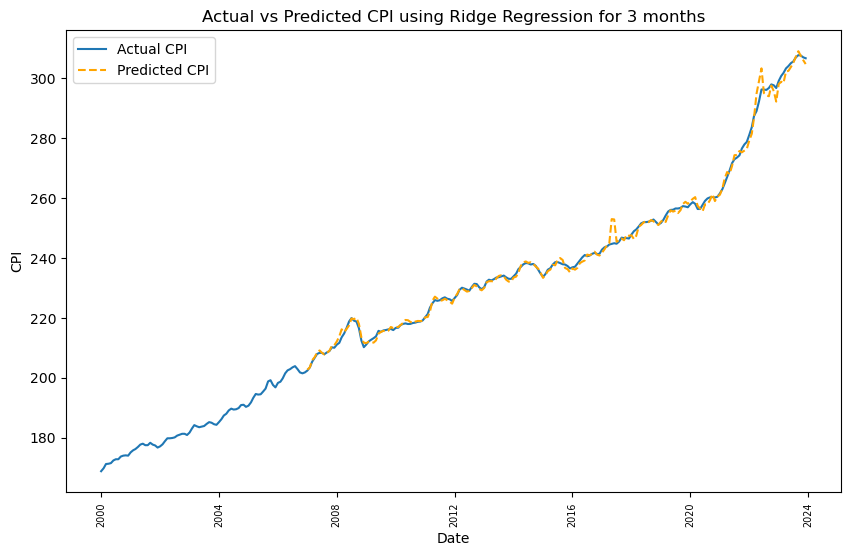

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 10.0
Root Mean Squared Error (RMSE) for 6 months: 1.661813737213197


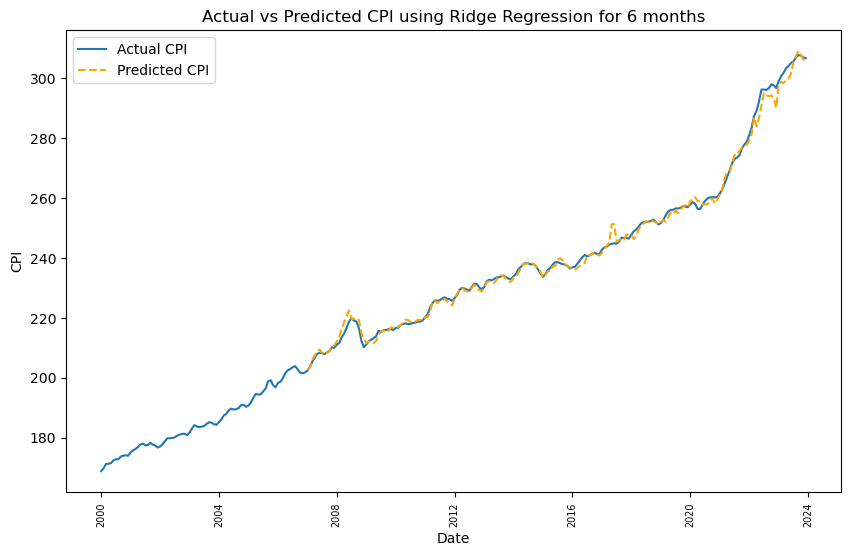

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 10.0
Root Mean Squared Error (RMSE) for 12 months: 2.773722158960989


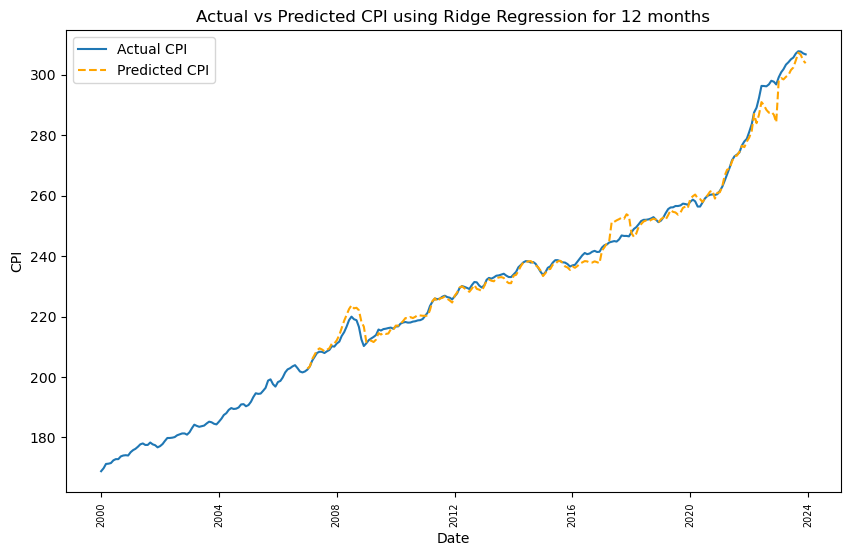

In [172]:
#Level 4
level4_df = df[df['display_level']==4][["month","item_name","value"]]
level4_df = level4_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_indicators_lv4 = level4_df.fillna(0)

for j in forecast_horizon:
    alphas = [0.05, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators_lv4, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 0.05
Root Mean Squared Error (RMSE) for 3 months: 3.2725818526274395


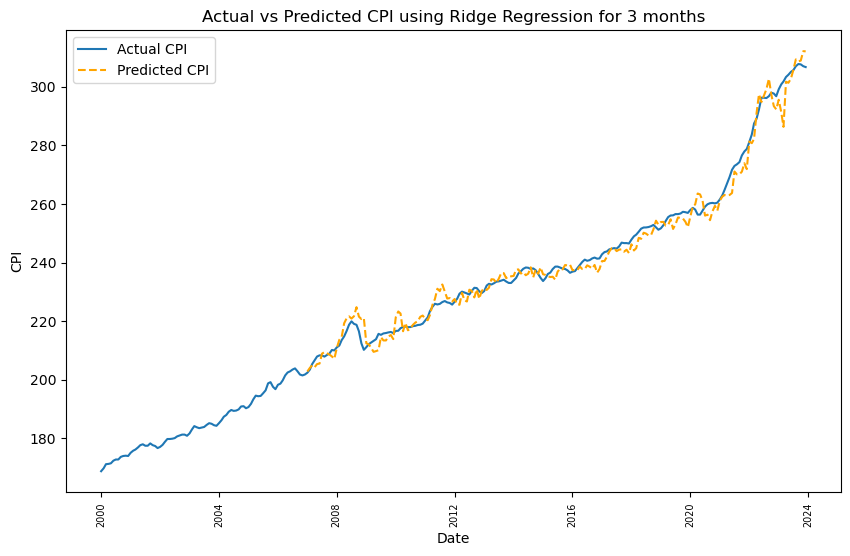

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 0.05
Root Mean Squared Error (RMSE) for 6 months: 4.261884404072612


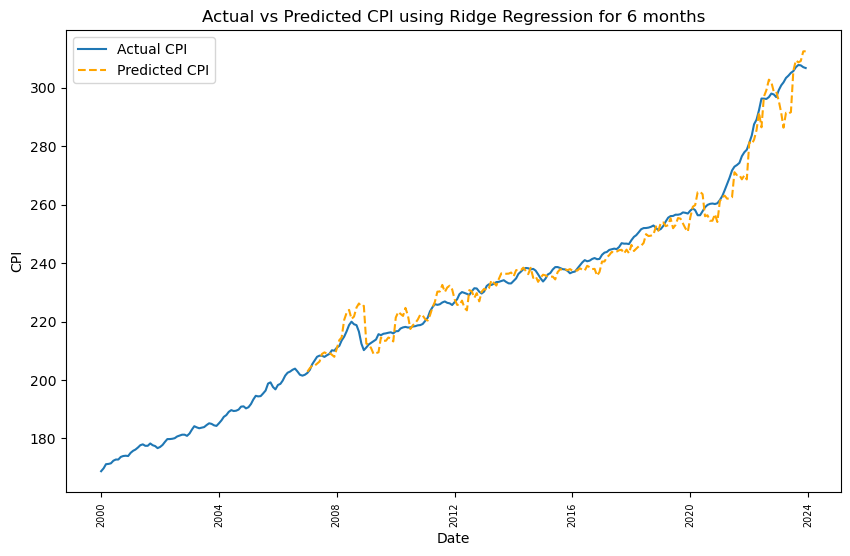

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 1.0
Root Mean Squared Error (RMSE) for 12 months: 5.817098810467862


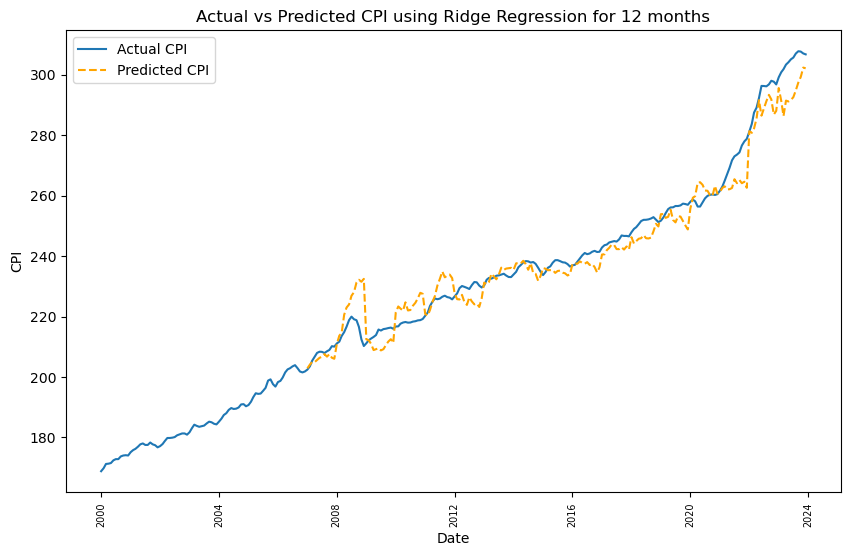

In [181]:
#Level 5
level5_df = df[df['display_level']==5][["month","item_name","value"]]
level5_df = level5_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_indicators_lv5 = level5_df.fillna(0)

for j in forecast_horizon:
    alphas = [0.05, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators_lv5, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 10.0
Root Mean Squared Error (RMSE) for 3 months: 3.9592863065740938


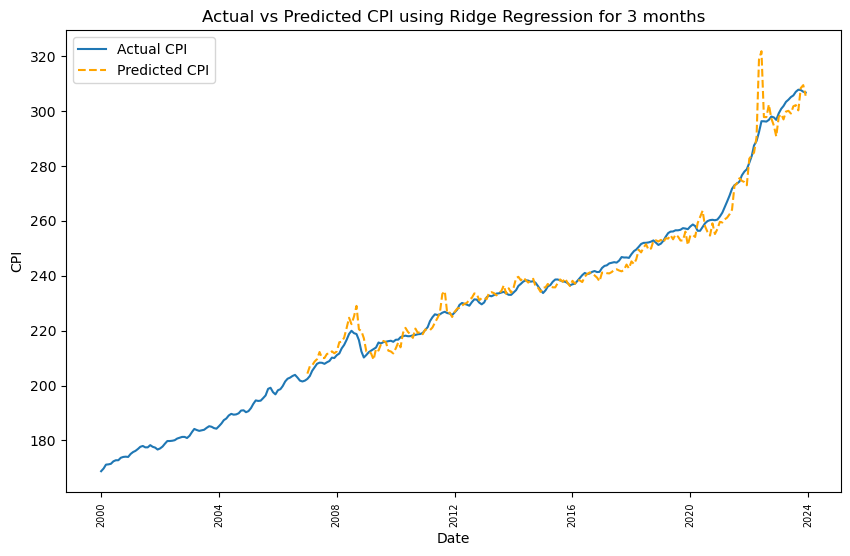

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 10.0
Root Mean Squared Error (RMSE) for 6 months: 4.667415707003757


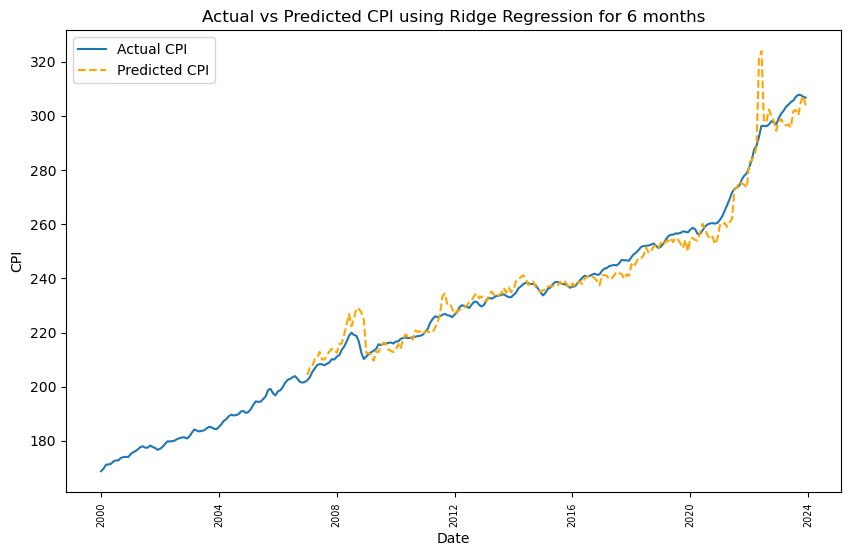

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 10.0
Root Mean Squared Error (RMSE) for 12 months: 8.233445322797353


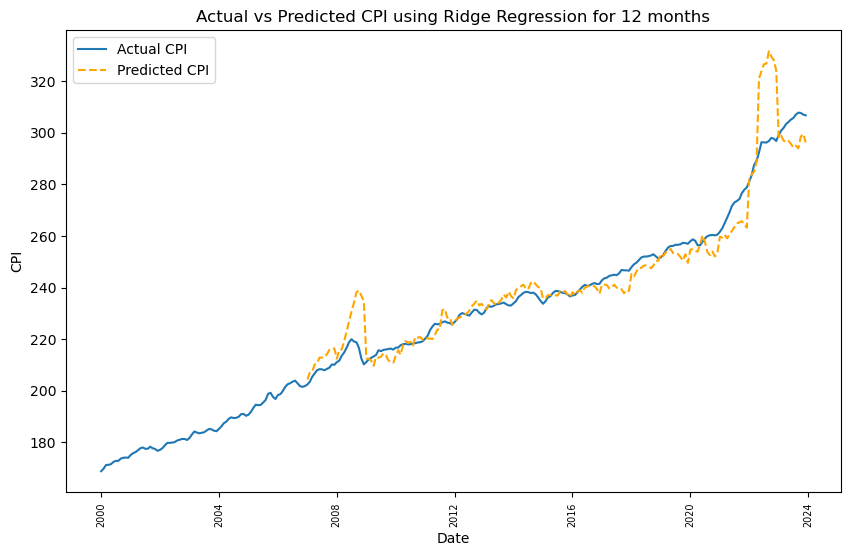

In [182]:
#Level 6
level6_df = df[df['display_level']==6][["month","item_name","value"]]
level6_df = level6_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_indicators_lv6 = level6_df.fillna(0)

for j in forecast_horizon:
    alphas = [0.05, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators_lv6, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 0.05
Root Mean Squared Error (RMSE) for 3 months: 4.402208878593633


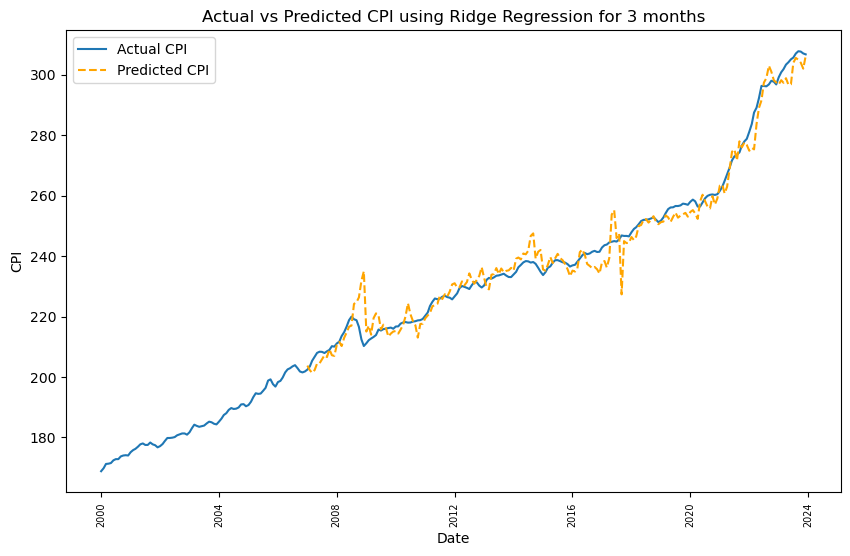

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 10.0
Root Mean Squared Error (RMSE) for 6 months: 6.04845398869164


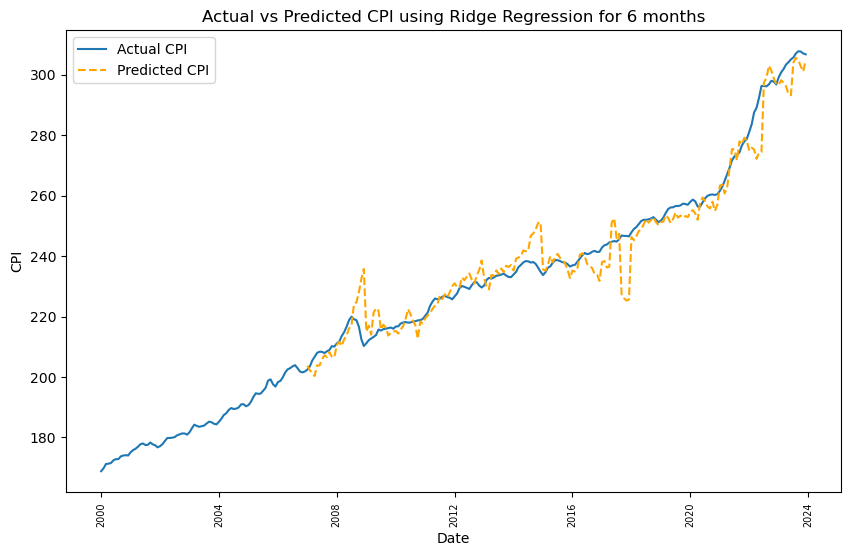

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 10.0
Root Mean Squared Error (RMSE) for 12 months: 8.220532781780703


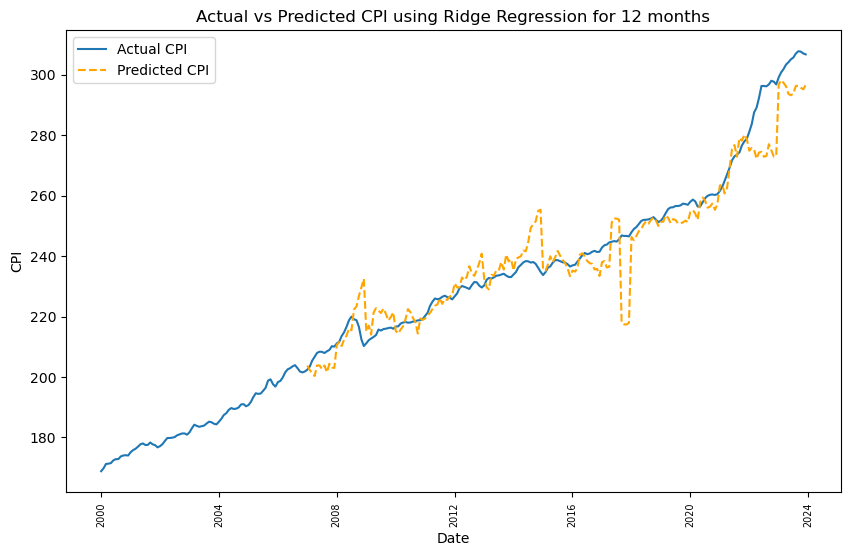

In [183]:
#Level 7
level7_df = df[df['display_level']==7][["month","item_name","value"]]
level7_df = level7_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_indicators_lv7 = level7_df.fillna(0)

for j in forecast_horizon:
    alphas = [0.05, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators_lv7, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 3 months: 0.05
Root Mean Squared Error (RMSE) for 3 months: 7.602667107765414


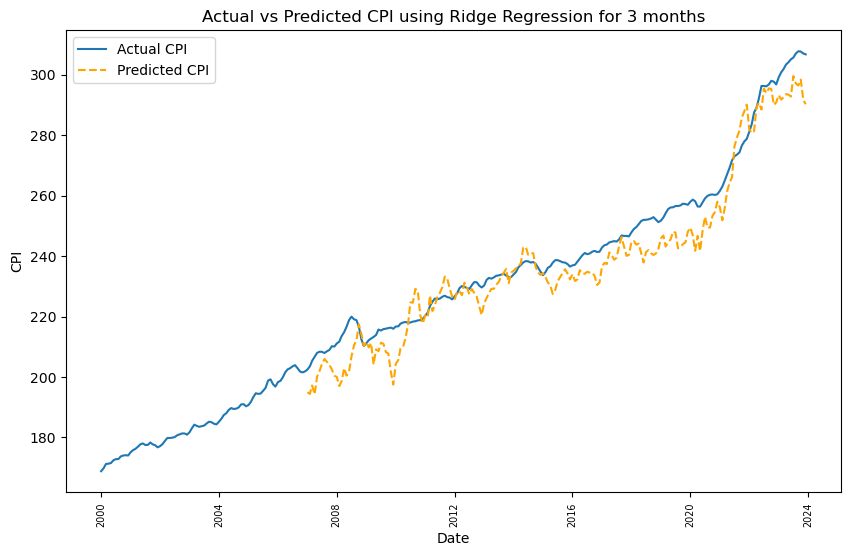

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 6 months: 0.05
Root Mean Squared Error (RMSE) for 6 months: 8.133701738465613


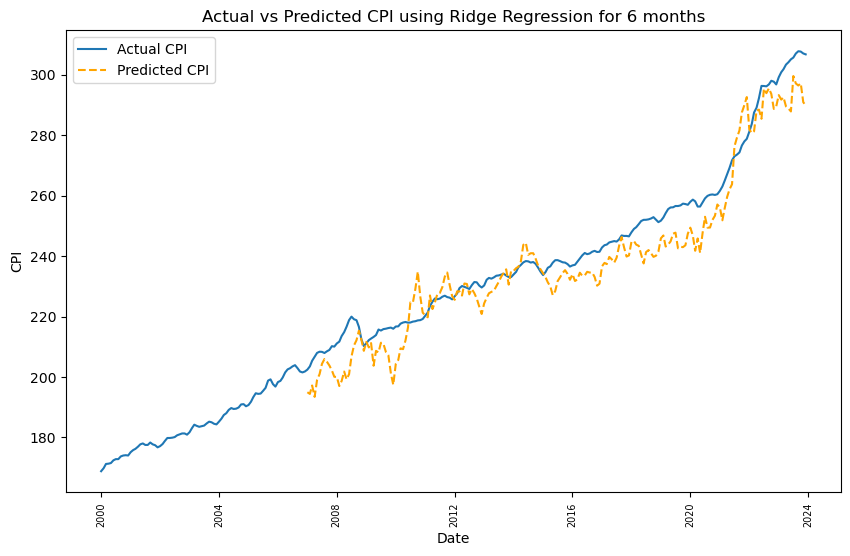

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\4043920728.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)


Best Alpha (Lambda) Value for 12 months: 0.05
Root Mean Squared Error (RMSE) for 12 months: 8.690554008646915


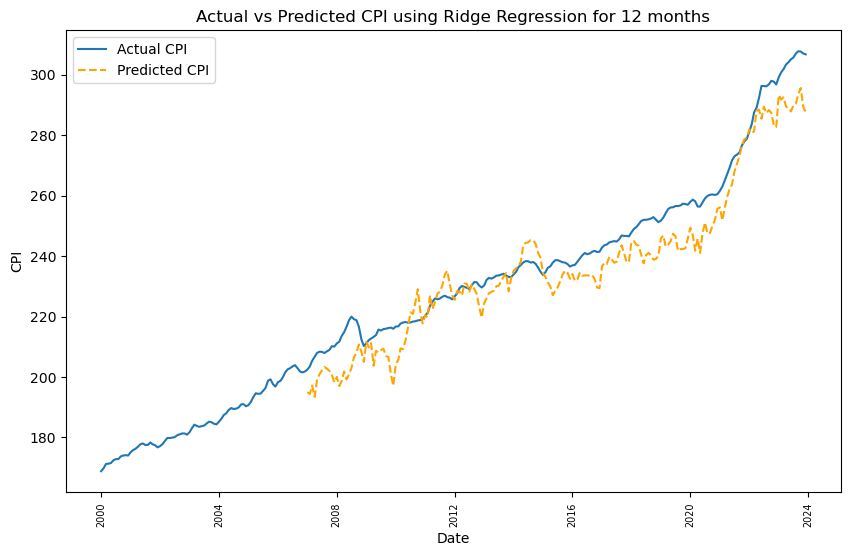

In [184]:
#Level 8
level8_df = df[df['display_level']==8][["month","item_name","value"]]
level8_df = level8_df[["month","item_name","value"]].pivot_table(index = "month", columns="item_name",values="value")
cpi_indicators_lv8 = level8_df.fillna(0)

for j in forecast_horizon:
    alphas = [0.05, 0.1, 1.0, 10.0]
    # Perform sliding window forecast using Ridge Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_ridge_forecast(cpi_indicators_lv8, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    import matplotlib.dates as mdates
    dtFmt = mdates.DateFormatter('%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.title(f'''Actual vs Predicted CPI using Ridge Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)
    plt.show()

LASSO

In [ ]:
# Example usage
# Assuming 'cpi_data' is a pandas DataFrame with datetime index and multiple CPI indicators as columns
# Replace this with your actual data loading and preprocessing steps

# Example data: random values for demonstration purposes
cpi_indicators

cpi_values

In [127]:

from sklearn.linear_model import LassoCV


def sliding_window_lasso_forecast(X, y, window_size, forecast_horizon, alphas):
    predictions = pd.Series(index=y.index)

    for i in range(window_size, len(X)-forecast_horizon+1,forecast_horizon):
        # Extract the training data for the current window
        train_X = X.iloc[i-window_size:i]
        train_y = y.iloc[i-window_size:i]
        
        kfcv = KFold(n_splits=5)
        # Initialize Lasso Regression model with cross-validation
        lasso_cv = LassoCV(alphas=alphas, cv=kfcv)

        # Fit the Lasso Regression model on the training data
        lasso_cv.fit(train_X, train_y)

        # Forecast the next 'forecast_horizon' months
        forecast_X = X.iloc[i:i+forecast_horizon, :]

        # Predict the values using the Ridge Regression model
        forecast_predictions = lasso_cv.predict(forecast_X)

        # Append only the predictions for the test set to the result list
        forecast_dates = y.index[i:i+forecast_horizon]
        predictions.loc[forecast_dates] = forecast_predictions.flatten()

    return predictions, lasso_cv.alpha_



window_size = 7 * 12  # 7 years of monthly data
forecast_horizon = [3,6,12]  # 12 months forecast

# Define hyperparameter values to search (alphas for Lasso Regression)
alphas = [0.1, 1.0, 10.0]



C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase 

Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 0.23658651023778454


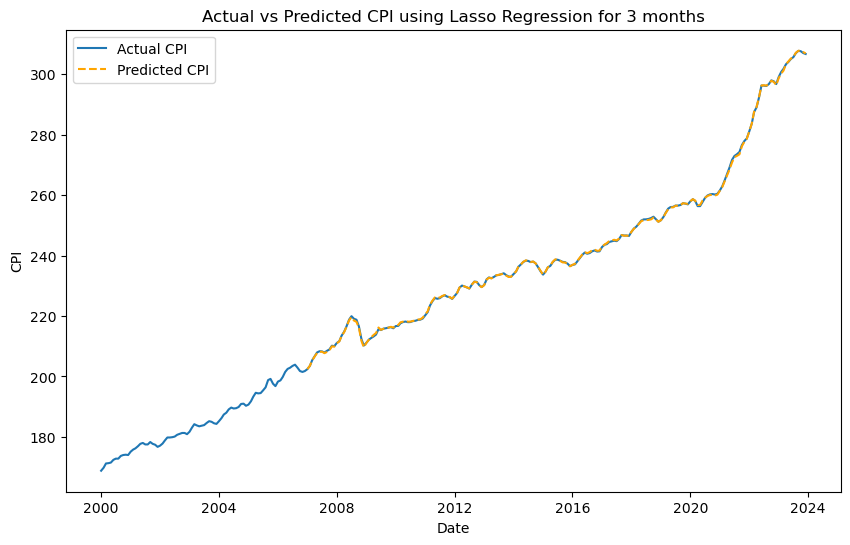

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Best Alpha (Lambda) Value for 6 months: 0.1
Root Mean Squared Error (RMSE) for 6 months: 0.2873593180678004


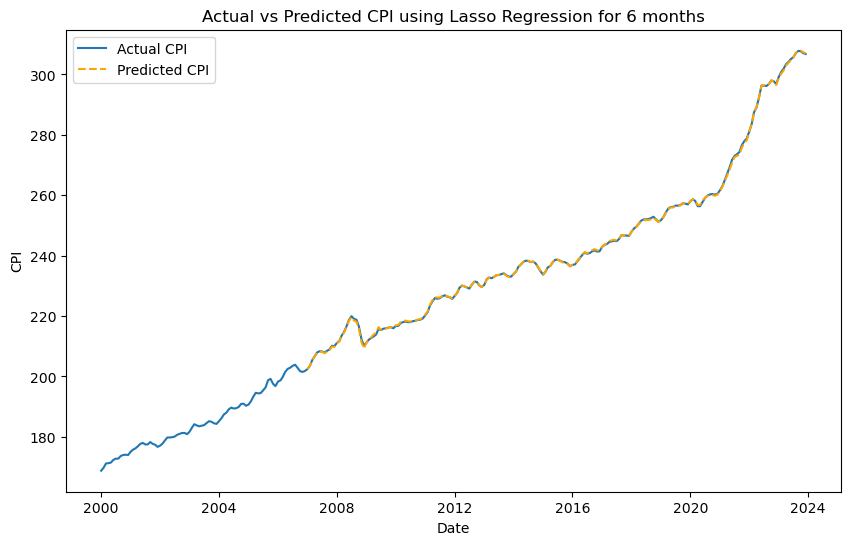

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Best Alpha (Lambda) Value for 12 months: 0.1
Root Mean Squared Error (RMSE) for 12 months: 0.405745451272224


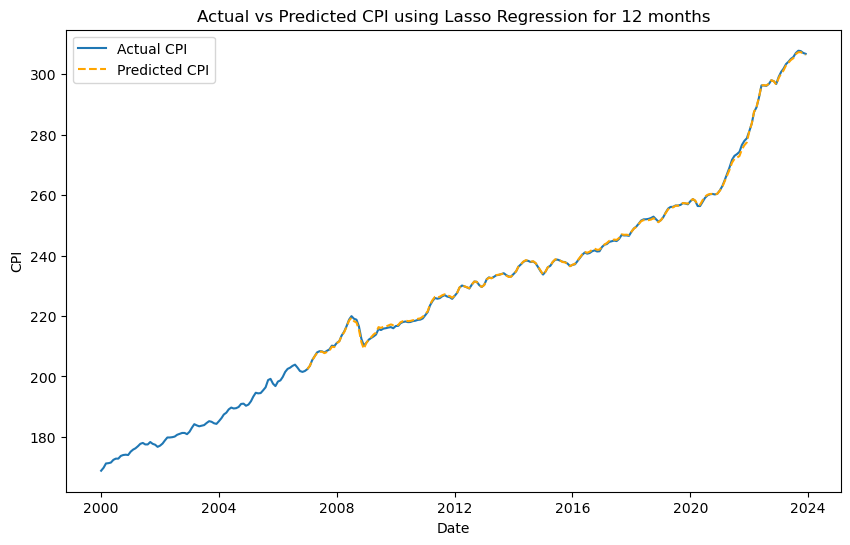

In [128]:
#level 0
for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3757979131993094, tolerance: 0.7906179104477613
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You m

Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 0.425249117707886


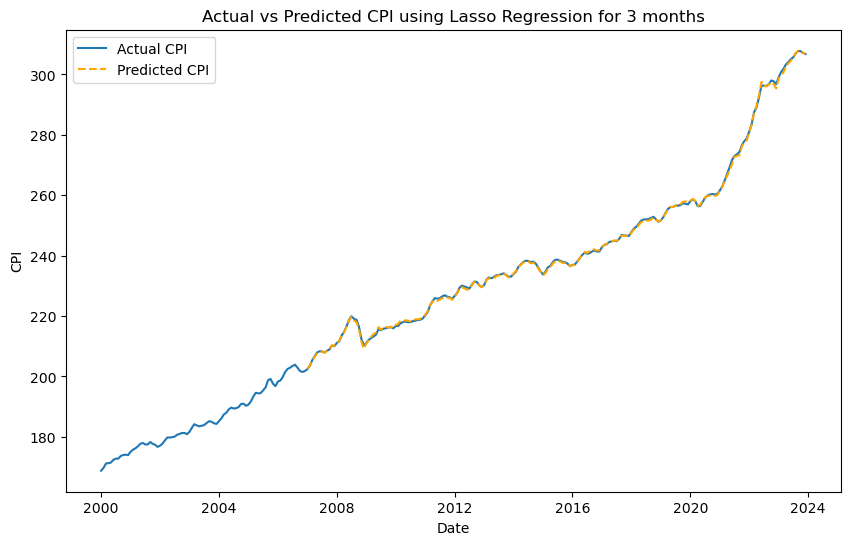

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3757979131993094, tolerance: 0.7906179104477613
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You m

Best Alpha (Lambda) Value for 6 months: 0.1
Root Mean Squared Error (RMSE) for 6 months: 0.5202476040274665


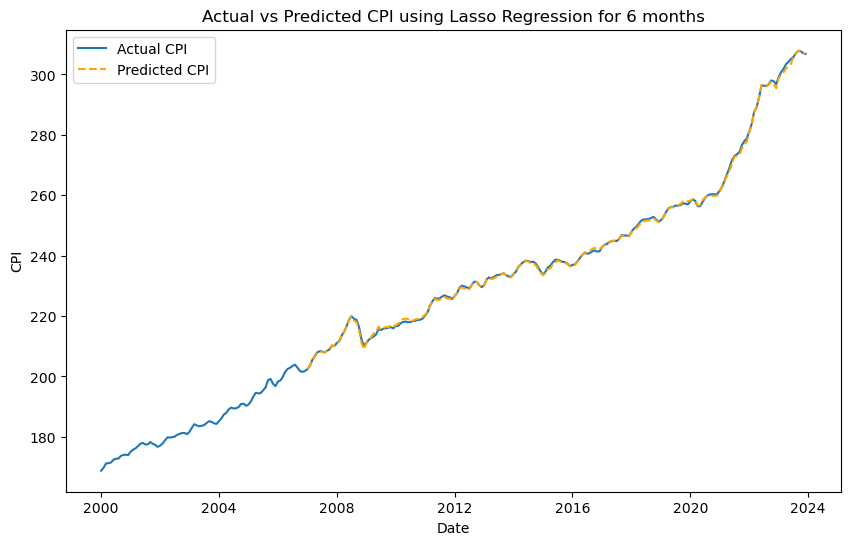

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3757979131993094, tolerance: 0.7906179104477613
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You m

Best Alpha (Lambda) Value for 12 months: 0.1
Root Mean Squared Error (RMSE) for 12 months: 0.7299028881993725


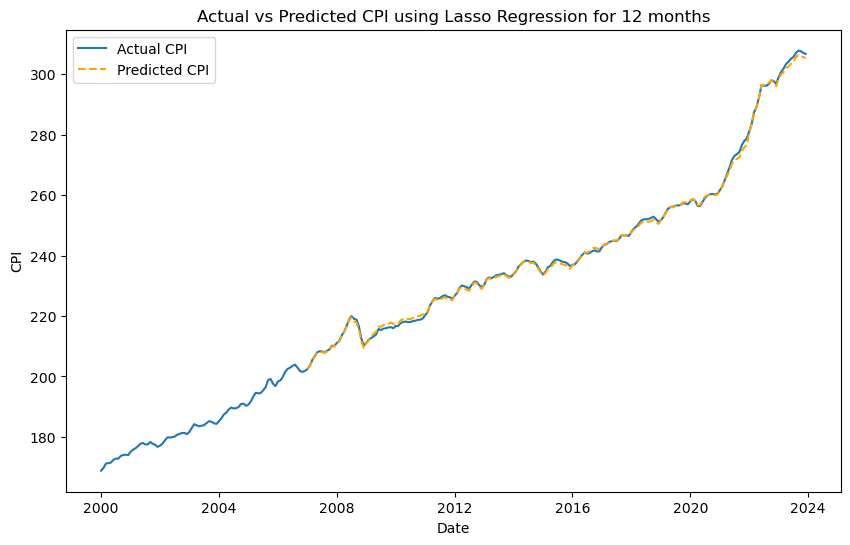

In [129]:
#level 1


for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators_lv1, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.399e-01, tolerance: 6.990e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: Conve

Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 1.110206493774975


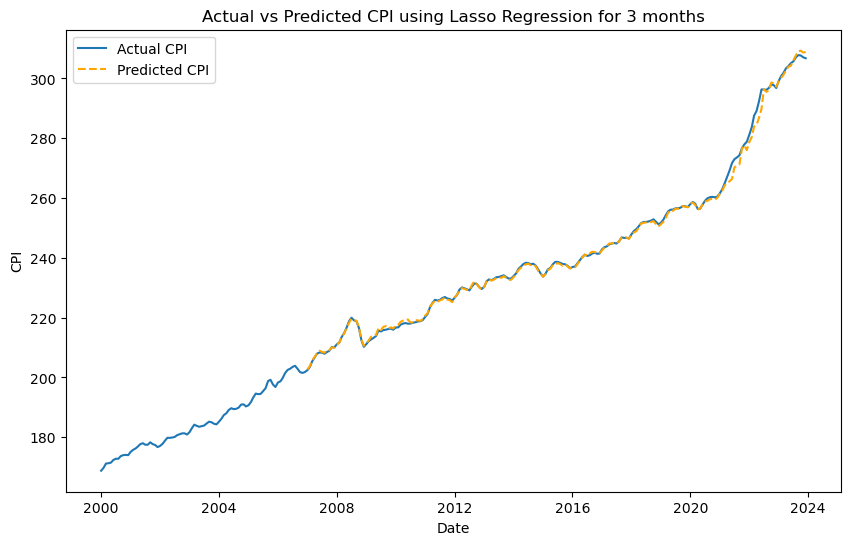

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.399e-01, tolerance: 6.990e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: Conve

Best Alpha (Lambda) Value for 6 months: 0.1
Root Mean Squared Error (RMSE) for 6 months: 1.6423487116251205


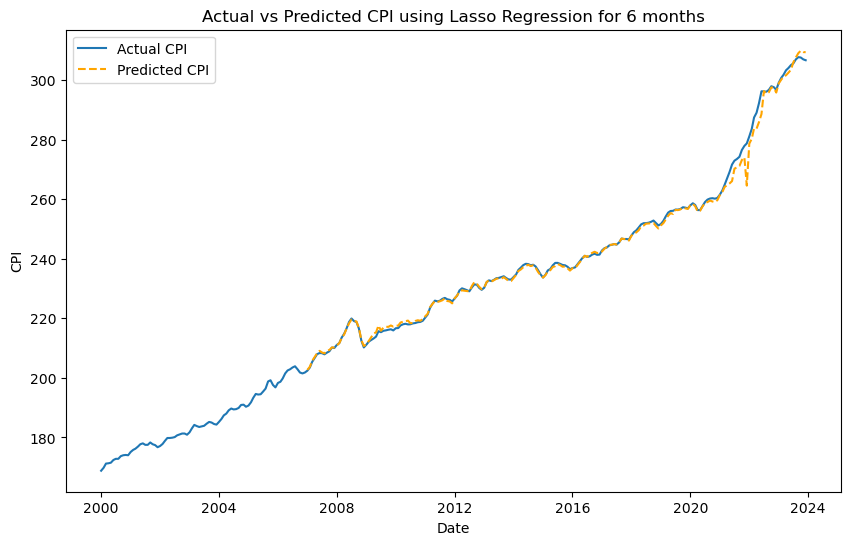

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.399e-01, tolerance: 6.990e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: Conve

Best Alpha (Lambda) Value for 12 months: 1.0
Root Mean Squared Error (RMSE) for 12 months: 2.5385231776063297


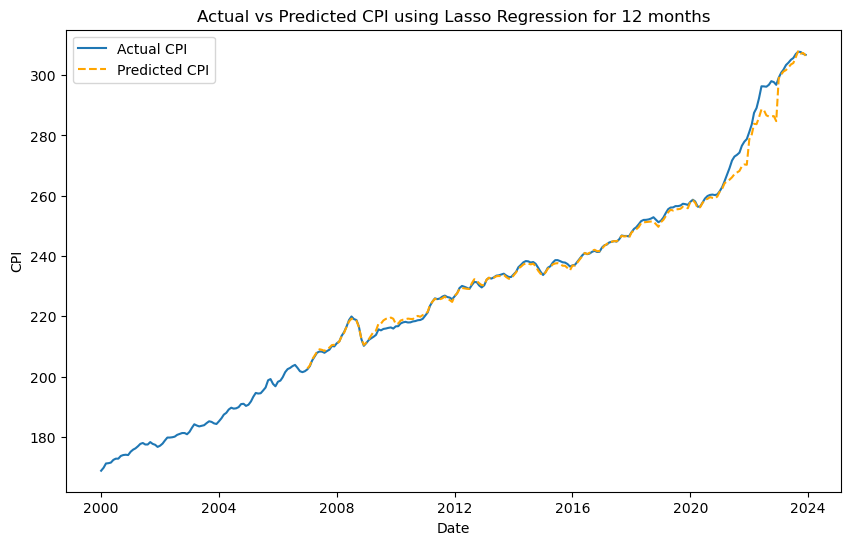

In [130]:
#level 2


for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators_lv2, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.775e-01, tolerance: 4.764e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: Conve

Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 1.0335350021078393


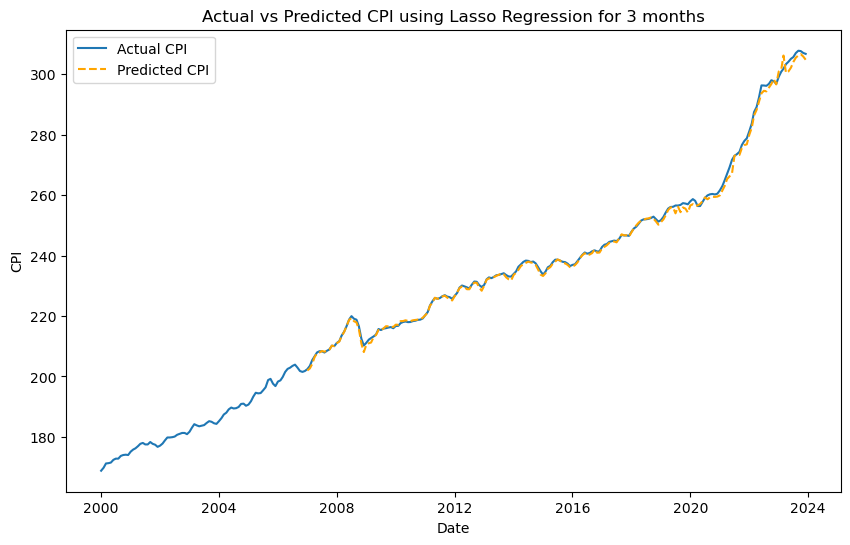

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.775e-01, tolerance: 4.764e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: Conve

Best Alpha (Lambda) Value for 6 months: 10.0
Root Mean Squared Error (RMSE) for 6 months: 1.2860079441910712


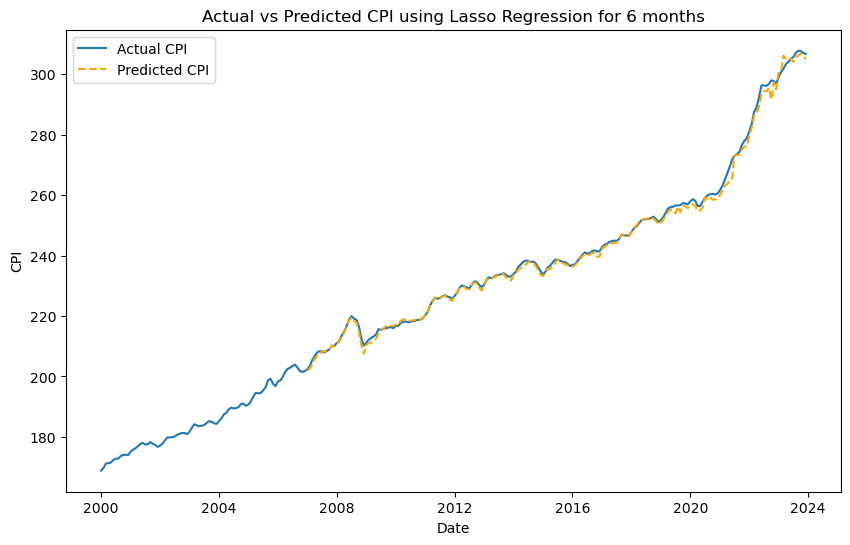

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.775e-01, tolerance: 4.764e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: Conve

Best Alpha (Lambda) Value for 12 months: 0.1
Root Mean Squared Error (RMSE) for 12 months: 2.1729115353403192


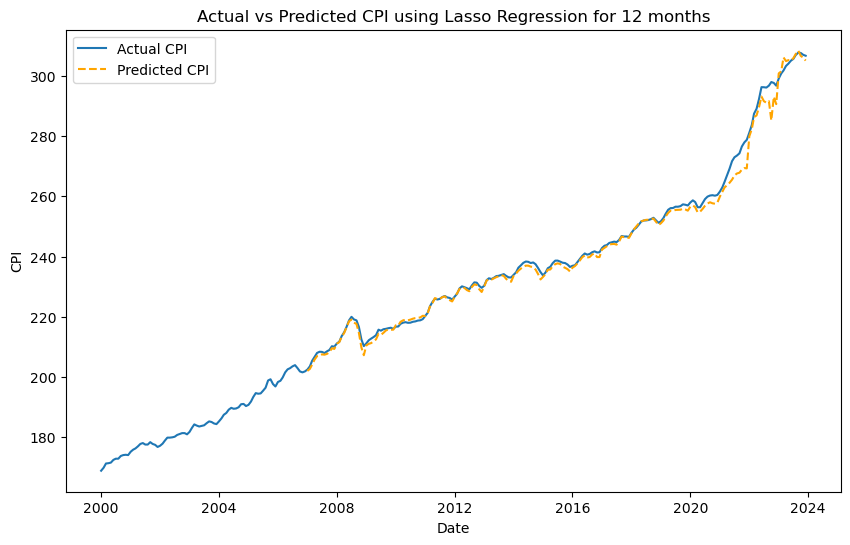

In [131]:
#level 3


for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators_lv3, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5152244782696034, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mi

Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 4.900967048067933


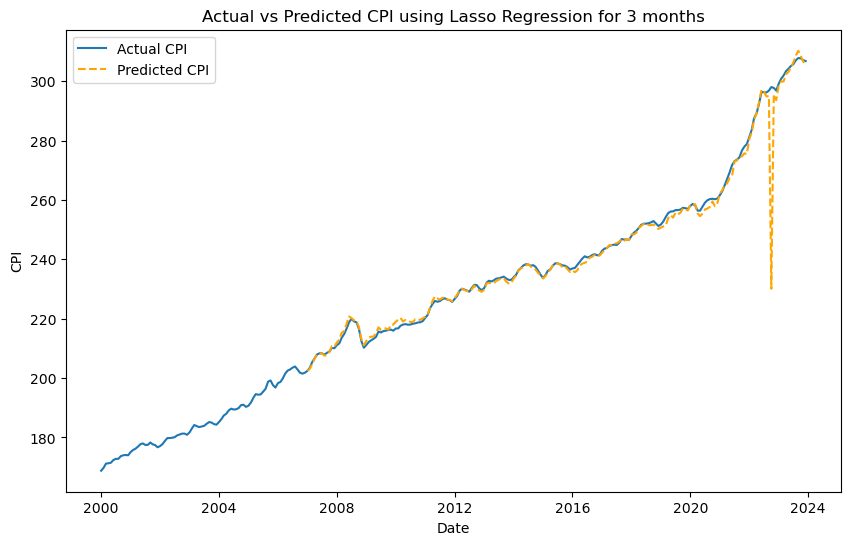

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5152244782696034, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mi

Best Alpha (Lambda) Value for 6 months: 0.1
Root Mean Squared Error (RMSE) for 6 months: 5.085550726115495


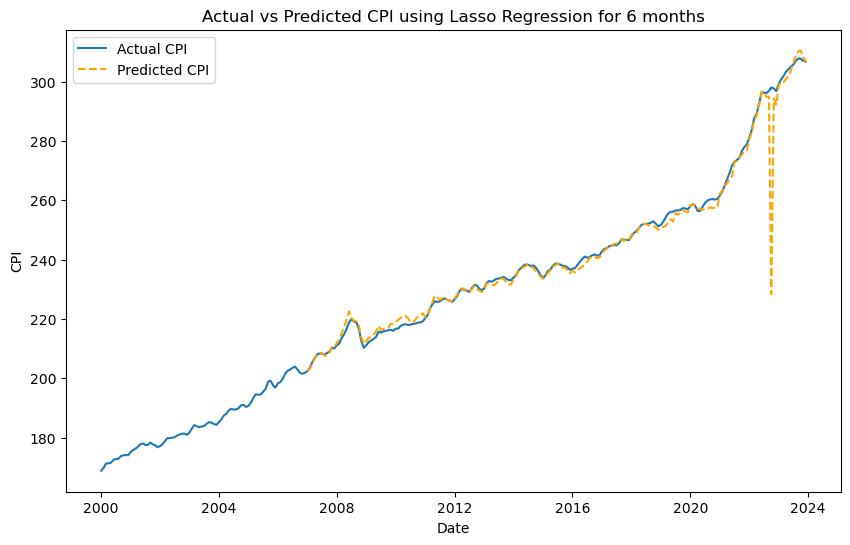

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5152244782696034, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mi

Best Alpha (Lambda) Value for 12 months: 0.1
Root Mean Squared Error (RMSE) for 12 months: 5.903930180441409


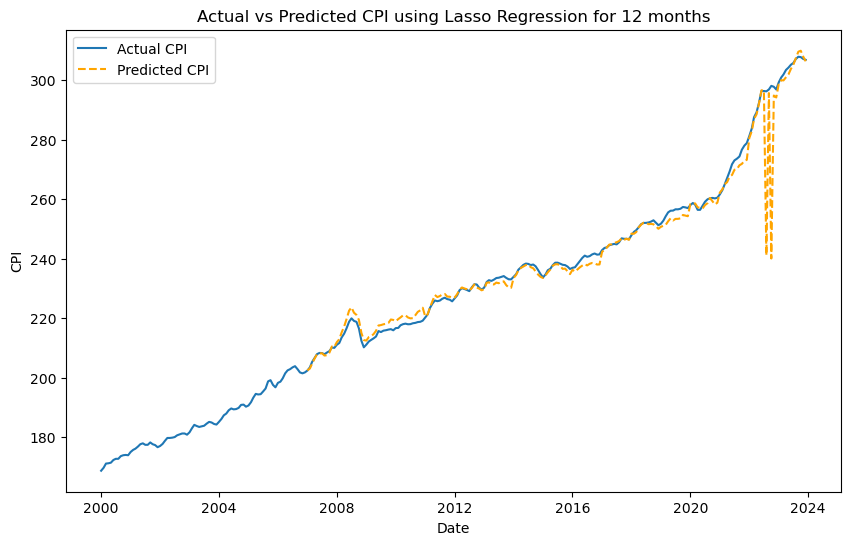

In [132]:
#level 4


for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators_lv4, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.677060450999967, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mig

Best Alpha (Lambda) Value for 3 months: 1.0
Root Mean Squared Error (RMSE) for 3 months: 3.1792874682534054


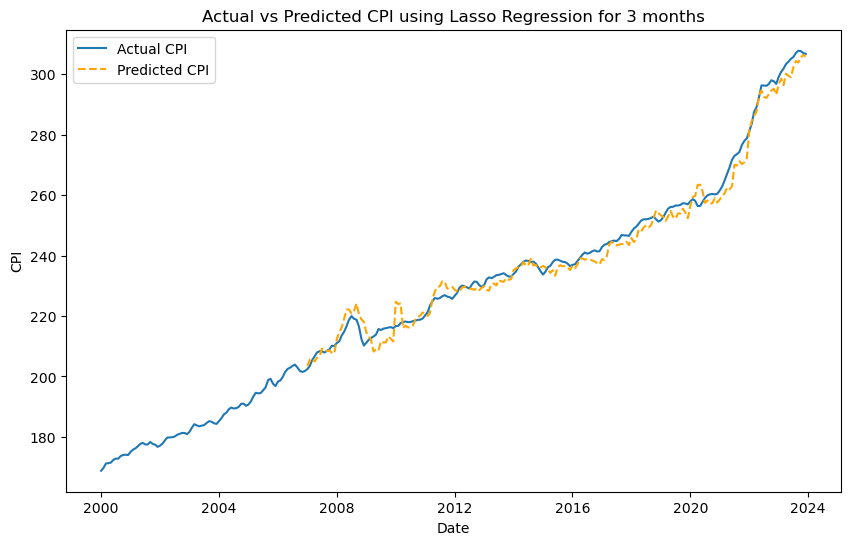

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.677060450999967, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mig

Best Alpha (Lambda) Value for 6 months: 1.0
Root Mean Squared Error (RMSE) for 6 months: 3.9268201405096557


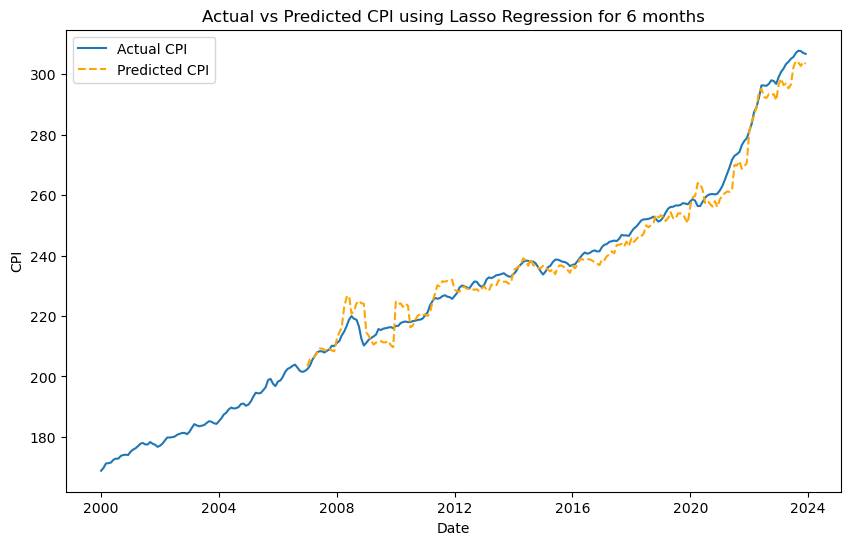

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.677060450999967, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mig

Best Alpha (Lambda) Value for 12 months: 10.0
Root Mean Squared Error (RMSE) for 12 months: 5.653354619808988


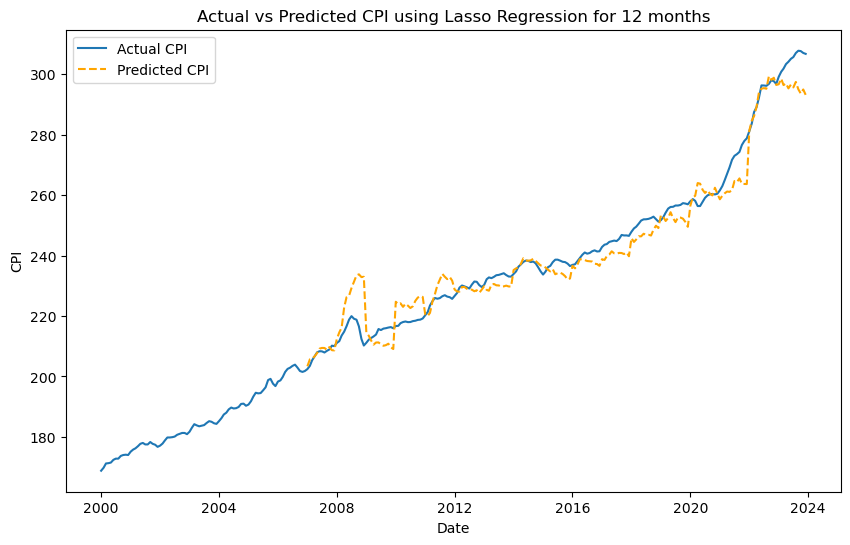

In [133]:
#level 5


for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators_lv5, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.016582114977595, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mig

Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 2.8172735109716642


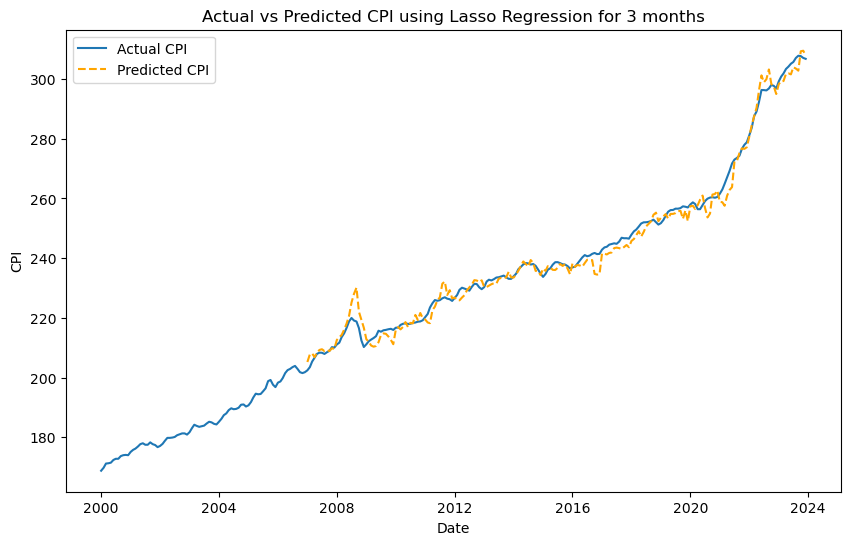

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.016582114977595, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mig

Best Alpha (Lambda) Value for 6 months: 0.1
Root Mean Squared Error (RMSE) for 6 months: 3.5145812197713457


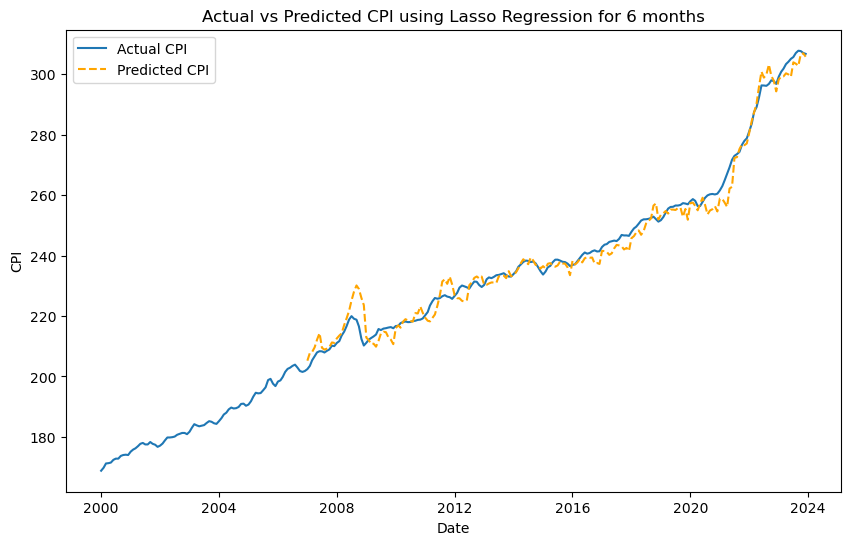

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.016582114977595, tolerance: 0.698950417910448
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You mig

Best Alpha (Lambda) Value for 12 months: 1.0
Root Mean Squared Error (RMSE) for 12 months: 4.5440334245836445


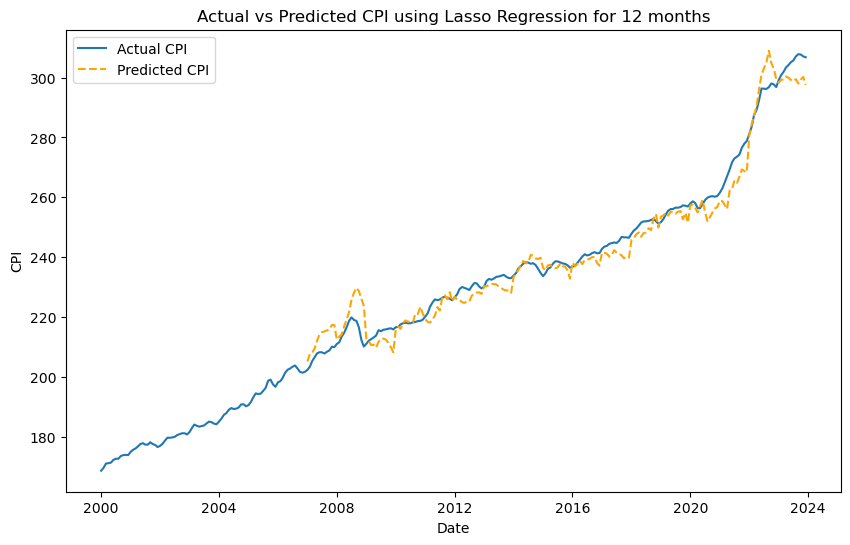

In [134]:
#level 6


for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators_lv6, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 4.201731187396446


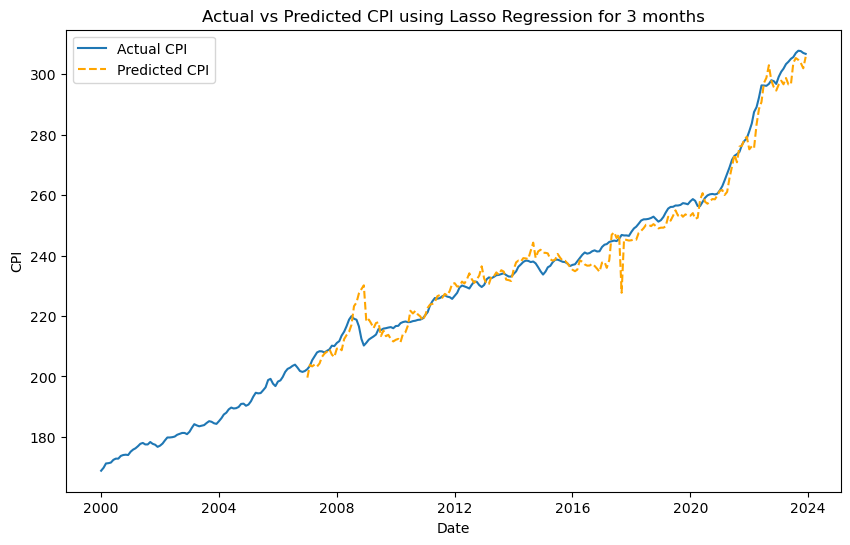

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Best Alpha (Lambda) Value for 6 months: 0.1
Root Mean Squared Error (RMSE) for 6 months: 5.829586189161849


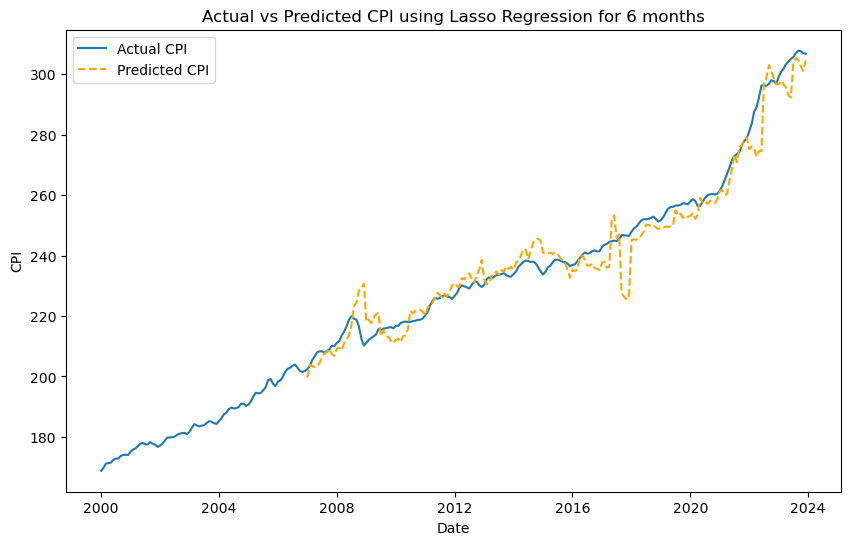

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Best Alpha (Lambda) Value for 12 months: 0.1
Root Mean Squared Error (RMSE) for 12 months: 8.229424970385095


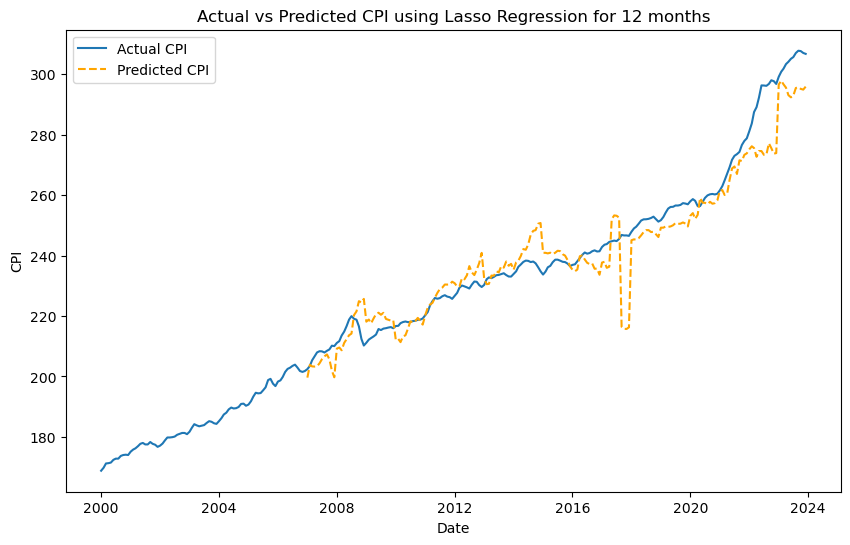

In [135]:
#level 7


for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators_lv7, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Best Alpha (Lambda) Value for 3 months: 0.1
Root Mean Squared Error (RMSE) for 3 months: 8.120871785039926


c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


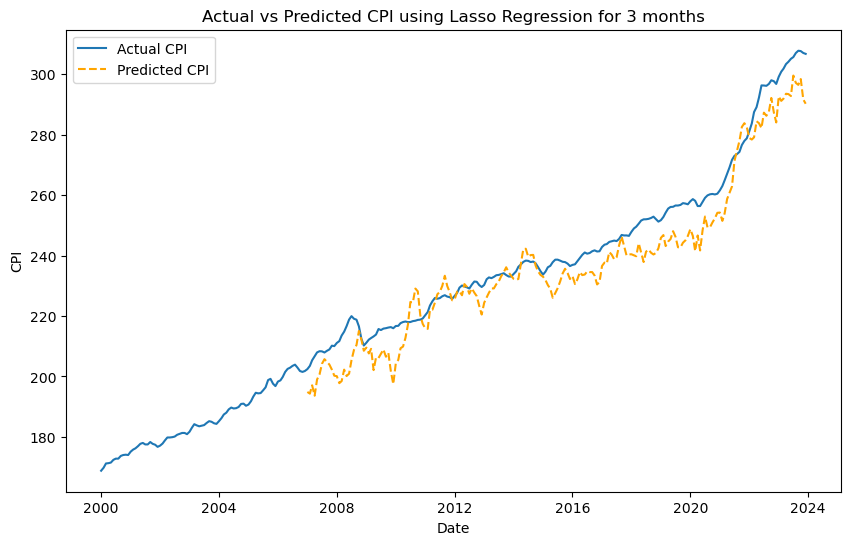

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Best Alpha (Lambda) Value for 6 months: 0.1
Root Mean Squared Error (RMSE) for 6 months: 8.673137398725093


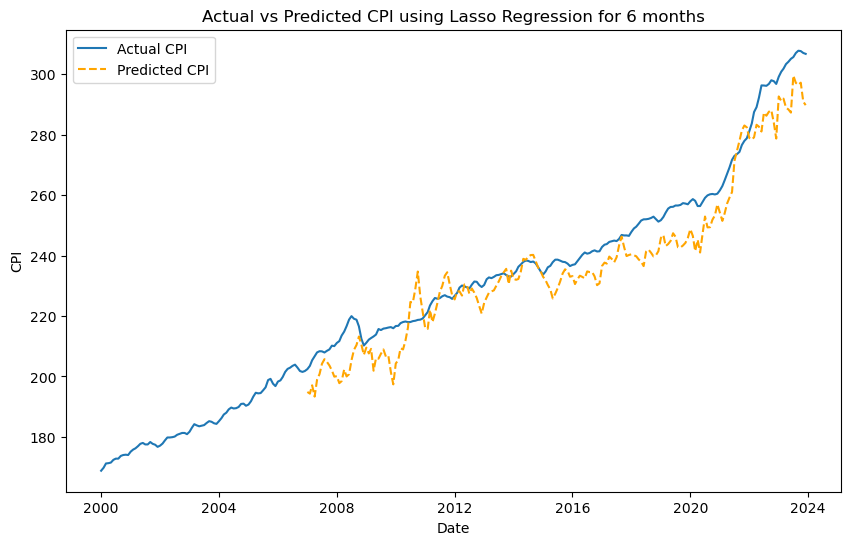

C:\Users\nguye\AppData\Local\Temp\ipykernel_41124\1494959067.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions = pd.Series(index=y.index)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Best Alpha (Lambda) Value for 12 months: 1.0
Root Mean Squared Error (RMSE) for 12 months: 9.329685030912772


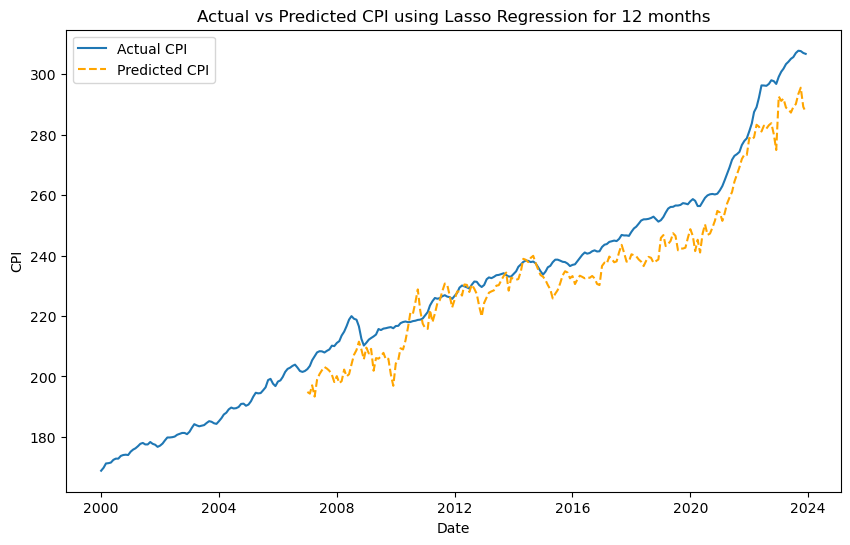

In [136]:
#level 8


for j in forecast_horizon:
    # Perform sliding window forecast using Lasso Regression with hyperparameter tuning
    predicted_values, best_alpha = sliding_window_lasso_forecast(cpi_indicators_lv8, cpi_values, window_size, j, alphas)


    # Calculate RMSE
    rmse = sqrt(mean_squared_error(cpi_values.iloc[85:], predicted_values.iloc[85:]))

    # Print RMSE and best hyperparameter (alpha)
    print(f"""Best Alpha (Lambda) Value for {j} months:""", best_alpha)
    print(f"""Root Mean Squared Error (RMSE) for {j} months:""", rmse)

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(cpi_values.index, cpi_values, label='Actual CPI')
    plt.plot(predicted_values.index, predicted_values, label='Predicted CPI', linestyle='dashed', color='orange')
    plt.title(f'''Actual vs Predicted CPI using Lasso Regression for {j} months''')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()